In [1]:
#Importing Required Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data to a DataFrame using Pandas and displaying it

columns_=['user_id','item_id','rating','timestamp']
df1=pd.read_csv('/home/mhmd/Documents/Datasets/movies.csv',index_col=[0])
df1.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
df1.shape

(100003, 4)

In [3]:
#Loading Movie title data to a DataFrame using Pandas and displaying it

df2=pd.read_csv('/home/mhmd/Documents/Datasets/movies_titles.csv',index_col=[0])
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
#Merging Two DataFrames

df3=pd.merge(df1,df2,on='item_id')
df3.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
#Performing Some EDA

df3.groupby('title') ['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [6]:
df3.groupby('title') ['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [54]:
df4=pd.DataFrame(df3.groupby('title')['rating'].mean())
df4.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [55]:
df4['number_of_ratings']=df3.groupby('title') ['rating'].count()
df4.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


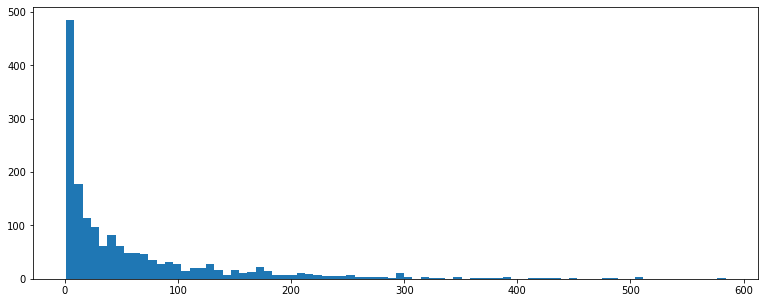

In [9]:
#Visualisation using Histogram

plt.figure(figsize=(13,5))
plt.hist(df4.number_of_ratings,bins=80)
plt.show()

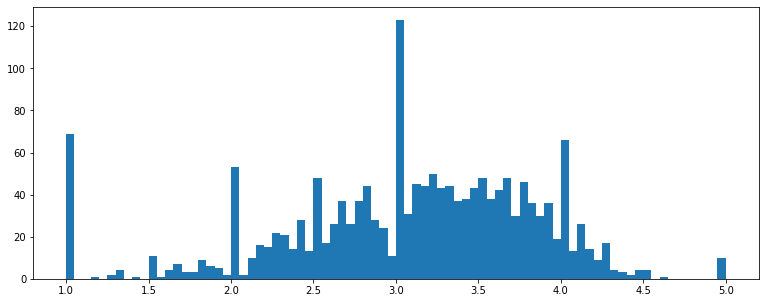

In [10]:
plt.figure(figsize=(13,5))
plt.hist(df4.rating,bins=80)
plt.show()

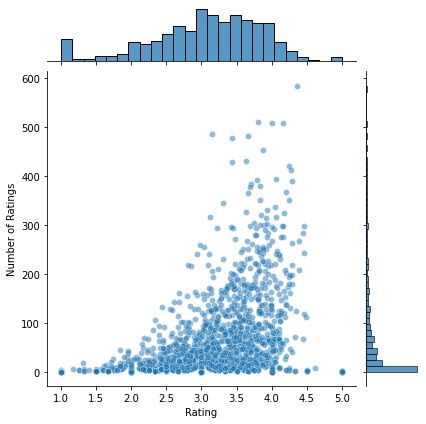

In [11]:
plot=sns.jointplot(x='rating',y='number_of_ratings',data=df4,alpha=.5)
plot.set_axis_labels(xlabel='Rating',ylabel='Number of Ratings')

In [12]:
#Creating a matrix that has the user ids on one axis and the movie title on another axis

df5=df3.pivot_table(index='user_id',columns='title',values='rating')
df5.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#Most rated Movies with their number of ratings

df4.sort_values('number_of_ratings',ascending=False)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [48]:
#Selecting a Movie

movie_name=input('Enter A movie Name:')

Enter A movie Name: Star Wars (1977)


In [58]:
movie_user_ratings=df5[movie_name]
movie_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [59]:
#getting correlations between two pandas series

similar_to_movie=df5.corrwith(movie_user_ratings)
print(similar_to_movie)

/home/mhmd/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mhmd/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [34]:
corelation=pd.DataFrame(similar_to_movie,columns=['corelation'])
corelation.head()

,corelation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [35]:
corelation.sort_values('corelation',ascending=False)

,corelation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [36]:
corelation=corelation.join(df4.number_of_ratings)
corelation.head()

,corelation,number_of_ratings
title,,
'Til There Was You (1997),0.872872,NaN
1-900 (1994),-0.645497,NaN
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,NaN


In [60]:
#Filtering out movies that have less than 100 reviews 

rec=corelation.loc[corelation.number_of_ratings>100].sort_values('corelation',ascending=False)
rec=rec.head(6)
rec=list(rec.index)
name=rec[0]
rec.remove(name)

In [61]:
print('Recommended Movies Are')
print('.......................')
for i in range(0,len(rec)):
    print(f'{i+1})  {rec[i]}')

Recommended Movies Are
.......................
1)  Empire Strikes Back, The (1980)
2)  Return of the Jedi (1983)
3)  Raiders of the Lost Ark (1981)
4)  Austin Powers: International Man of Mystery (1997)
5)  Sting, The (1973)


In [62]:
#Creating a Function for Recommend Movies

def predict(movie_name):
    movie_user_ratings=df5[movie_name]
    similar_to_movie=df5.corrwith(movie_user_ratings)
    corelation=pd.DataFrame(similar_to_movie,columns=['corelation'])
    corelation=corelation.join(df4.number_of_ratings)
    rec=corelation.loc[corelation.number_of_ratings>100].sort_values('corelation',ascending=False)
    rec=rec.head(6)
    rec=list(rec.index)
    name=rec[0]
    rec.remove(name)
    print('Recommended Movies Are')
    print('.......................')
    for i in range(0,len(rec)):
        print(f'{i+1})  {rec[i]}')

In [63]:
movie_name=input('Enter Movie Name :')

Enter Movie Name : Return of the Jedi (1983)


In [64]:
predict(movie_name)

/home/mhmd/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mhmd/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Recommended Movies Are
.......................
1)  Empire Strikes Back, The (1980)
2)  Star Wars (1977)
3)  Raiders of the Lost Ark (1981)
4)  Indiana Jones and the Last Crusade (1989)
5)  Sneakers (1992)
